# **Data**

For our exercises we will use two different datasets:
- The AG News subset that features english news articles of 4 different categories
- The 10kGNAD dataset that features german news articles of 9 different categories

In [1]:
import csv
import pandas as pd

# english data
classes_en = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}
train_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/train.csv", 
                       names = ["Label", "Title", "Article"],
                       encoding = "utf-8")
test_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/test.csv", 
                      names = ["Label", "Title", "Article"],
                      encoding = "utf-8")

# german data
train_de = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/10kGNAD/train.csv", 
                       sep = ";", names = ["Label", "Article"], 
                       quotechar = "\'", quoting = csv.QUOTE_MINIMAL, encoding = "utf-8")
test_de = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/10kGNAD/test.csv", 
                       sep = ";", names = ["Label", "Article"], 
                       quotechar = "\'", quoting = csv.QUOTE_MINIMAL, encoding = "utf-8")

### The english dataset features 120 000 training and 7600 test samples with equally balanced classes

In [2]:
print(train_en.shape)
print(test_en.shape)
train_en.head()

(120000, 3)
(7600, 3)


,Label,Title,Article
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


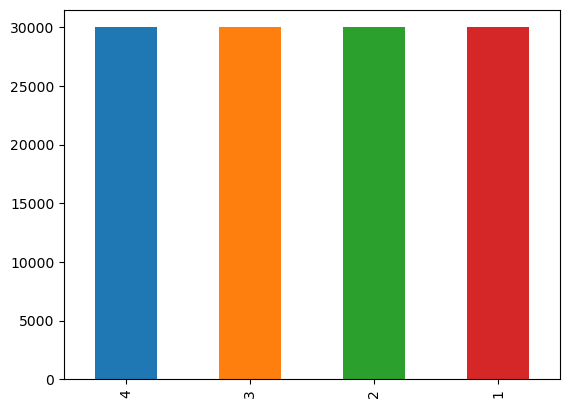

In [3]:
train_en["Label"].value_counts().plot(kind = "bar")

### The german dataset features 9245 training and 1028 test samples with rather unbalanced classes

In [4]:
print(train_de.shape)
print(test_de.shape)
train_de.head()

(9245, 2)
(1028, 2)


,Label,Article
0,Sport,21-Jähriger fällt wohl bis Saisonende aus. Wie...
1,Kultur,"Erfundene Bilder zu Filmen, die als verloren g..."
2,Web,Der frischgekürte CEO Sundar Pichai setzt auf ...
3,Wirtschaft,"Putin: ""Einigung, dass wir Menge auf Niveau vo..."
4,Inland,Estland sieht den künftigen österreichischen P...


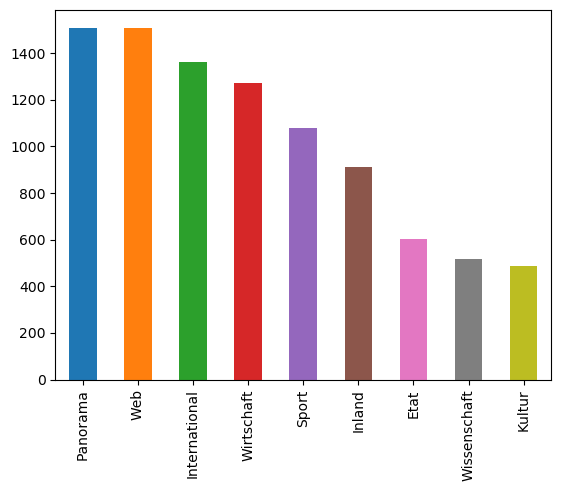

In [5]:
train_de["Label"].value_counts().plot(kind = "bar")

# **spaCy**

spaCy is a natural language processing library that comes with many built-in features that solve core linguistic tasks.  
The following exercises should be carried out by getting familiar with the spaCy API. The documentation can be found at:

[https://spacy.io/usage](https://spacy.io/usage)

spaCy needs a language model to analyze text, we will work with both the english and the german language models which can be downloaded by executing the following:

In [6]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 37.4/37.4 MB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'

    Error: Couldn't link model to 'en_core_web_sm'
    Creating a symlink in spacy/data failed. Make sure you have the required
    permissions and try re-running the command as admin, or use a
    virtualenv. You can still import the model as a module and call its
    load() method, or create the symlink manually.

    D:\Users\Micha\anaconda3\envs\text\lib\site-packages\en_core_web_sm -->
    D:\Users\Micha\anaconda3\envs\text\lib\site-packages\spacy\data\en_core_web_sm


    Creating a shortcut link for 'en' didn't work (maybe you don't have
    admin permissions?), but you can still load the model via its full
    package name: nlp = spacy.load('{name}')
    Download successful but linking failed



In [7]:
!python -m spacy download de_core_news_sm

     --------------------------------------- 38.2/38.2 MB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'

    Error: Couldn't link model to 'de_core_news_sm'
    Creating a symlink in spacy/data failed. Make sure you have the required
    permissions and try re-running the command as admin, or use a
    virtualenv. You can still import the model as a module and call its
    load() method, or create the symlink manually.

    D:\Users\Micha\anaconda3\envs\text\lib\site-packages\de_core_news_sm -->
    D:\Users\Micha\anaconda3\envs\text\lib\site-packages\spacy\data\de_core_news_sm


    Creating a shortcut link for 'en' didn't work (maybe you don't have
    admin permissions?), but you can still load the model via its full
    package name: nlp = spacy.load('{name}')
    Download successful but linking failed



### Loading models

In [8]:
import spacy
import random
import en_core_web_sm
import de_core_news_sm

nlp_en = en_core_web_sm.load()
nlp_de = de_core_news_sm.load()

### Use spaCy to tokenize a random Article of both the english and the german dataset

In [9]:
# english
r_en = random.randint(0, train_en.shape[0] - 1)
tokens_en = nlp_en(train_en["Article"].iloc[r_en])

print(train_en["Article"].iloc[r_en])
print([token_en.text for token_en in tokens_en])

UNITED NATIONS - The U.N. Security Council approved a resolution Saturday threatening oil sanctions against Sudan unless the government acts to rein in Arab militias accused of violence in the Darfur region that the United States has called genocide...
['UNITED', 'NATIONS', '-', 'The', 'U.N.', 'Security', 'Council', 'approved', 'a', 'resolution', 'Saturday', 'threatening', 'oil', 'sanctions', 'against', 'Sudan', 'unless', 'the', 'government', 'acts', 'to', 'rein', 'in', 'Arab', 'militias', 'accused', 'of', 'violence', 'in', 'the', 'Darfur', 'region', 'that', 'the', 'United', 'States', 'has', 'called', 'genocide', '...']


In [10]:
# german
r_de = random.randint(0, train_de.shape[0] - 1)
tokens_de = nlp_de(train_de["Article"].iloc[r_de])

print(train_de["Article"].iloc[r_de])
print([token_de.text for token_de in tokens_de])

Veilchen fügen Gegner in der Südstadt erste Saisonniederlage zu – Elfergoldschütze Alexander Gorgon bleibt dem Verein erhalten. Maria Enzersdorf – Die Admira hat in der siebenten Runde der Bundesliga zum ersten Mal eine Niederlage hinnehmen müssen. Beim 0:1 (0:0) gegen die Wiener Austria hatte das Team von Cheftrainer Ernst Baumeister zwar die besseren Chancen, aber Alexander Gorgon – der laut eigener Aussage bei der Austria bleiben wird – avancierte mit seinem siebenten Saisontor zum Matchwinner einer wahren Hitzeschlacht. Die Wiener traten von Beginn an dominant auf, erspielten aber wenige konkrete Torchancen, weil die Admira die Räume sehr eng machte. Gefährlich wurde es daher zunächst am ehesten nach Standardsituationen, aber weder Vanche Sikov, noch Gorgon konnten die Vorlagen von Raphael Holzhauser im Tor unterbringen. Die Gastgeber trauten sich erst nach einer Trinkpause mehr zu und übernahmen in weiterer Folge zunehmend das Kommando. Thomas Ebner vergab die erste echte Chance d

### Use spaCy to lemmatize a random Article of both the english and the german dataset

In [11]:
print(train_en["Article"].iloc[r_en])
print([token_en.lemma_ for token_en in tokens_en])

UNITED NATIONS - The U.N. Security Council approved a resolution Saturday threatening oil sanctions against Sudan unless the government acts to rein in Arab militias accused of violence in the Darfur region that the United States has called genocide...
['united', 'nations', '-', 'the', 'u.n.', 'security', 'council', 'approve', 'a', 'resolution', 'saturday', 'threaten', 'oil', 'sanction', 'against', 'sudan', 'unless', 'the', 'government', 'act', 'to', 'rein', 'in', 'arab', 'militia', 'accuse', 'of', 'violence', 'in', 'the', 'darfur', 'region', 'that', 'the', 'united', 'states', 'have', 'call', 'genocide', '...']


In [12]:
print(train_de["Article"].iloc[r_de])
print([token_de.lemma_ for token_de in tokens_de])

Veilchen fügen Gegner in der Südstadt erste Saisonniederlage zu – Elfergoldschütze Alexander Gorgon bleibt dem Verein erhalten. Maria Enzersdorf – Die Admira hat in der siebenten Runde der Bundesliga zum ersten Mal eine Niederlage hinnehmen müssen. Beim 0:1 (0:0) gegen die Wiener Austria hatte das Team von Cheftrainer Ernst Baumeister zwar die besseren Chancen, aber Alexander Gorgon – der laut eigener Aussage bei der Austria bleiben wird – avancierte mit seinem siebenten Saisontor zum Matchwinner einer wahren Hitzeschlacht. Die Wiener traten von Beginn an dominant auf, erspielten aber wenige konkrete Torchancen, weil die Admira die Räume sehr eng machte. Gefährlich wurde es daher zunächst am ehesten nach Standardsituationen, aber weder Vanche Sikov, noch Gorgon konnten die Vorlagen von Raphael Holzhauser im Tor unterbringen. Die Gastgeber trauten sich erst nach einer Trinkpause mehr zu und übernahmen in weiterer Folge zunehmend das Kommando. Thomas Ebner vergab die erste echte Chance d

### Use spaCy for Part-Of-Speech tagging of a random Article of both the english and the german dataset

- Either print the token attributes or visualize them as a table!
- What do the attributes describe?
- Visualize the POS attribute as a dependency plot with spaCy's displacy!
- Optional: For the german dataset visualize sentences separately for better readability.

In [13]:
"""
    Text: The original word text.
    Lemma: The base form of the word.
    POS: The simple UPOS part-of-speech tag.
    Tag: The detailed part-of-speech tag.
    Dep: Syntactic dependency, i.e. the relation between tokens.
    Shape: The word shape – capitalization, punctuation, digits.
    is alpha: Is the token an alpha character?
    is stop: Is the token part of a stop list, i.e. the most common words of the language?
"""

token_df_en = pd.DataFrame({"Text": [token_en.text for token_en in tokens_en],
                            "Lemma": [token_en.lemma_ for token_en in tokens_en],
                            "POS": [token_en.pos_ for token_en in tokens_en],
                            "Tag": [token_en.tag_ for token_en in tokens_en],
                            "Dep": [token_en.dep_ for token_en in tokens_en],
                            "Shape": [token_en.shape_ for token_en in tokens_en],
                            "is alpha": [token_en.is_alpha for token_en in tokens_en],
                            "is stop": [token_en.is_stop for token_en in tokens_en]})

token_df_en.head()

,Text,Lemma,POS,Tag,Dep,Shape,is alpha,is stop
0,UNITED,united,PROPN,NNP,compound,XXXX,True,False
1,NATIONS,nations,PROPN,NNP,ROOT,XXXX,True,False
2,-,-,PUNCT,:,punct,-,False,False
3,The,the,DET,DT,det,Xxx,True,False
4,U.N.,u.n.,PROPN,NNP,compound,X.X.,False,False


In [14]:
from spacy import displacy

displacy.render(tokens_en, style = "dep", jupyter = True)

In [15]:
token_df_de = pd.DataFrame({"Text": [token_de.text for token_de in tokens_de],
                            "Lemma": [token_de.lemma_ for token_de in tokens_de],
                            "POS": [token_de.pos_ for token_de in tokens_de],
                            "Tag": [token_de.tag_ for token_de in tokens_de],
                            "Dep": [token_de.dep_ for token_de in tokens_de],
                            "Shape": [token_de.shape_ for token_de in tokens_de],
                            "is alpha": [token_de.is_alpha for token_de in tokens_de],
                            "is stop": [token_de.is_stop for token_de in tokens_de]})

token_df_de.head()

,Text,Lemma,POS,Tag,Dep,Shape,is alpha,is stop
0,Veilchen,Veilchen,NOUN,NN,sb,Xxxxx,True,False
1,fügen,fügen,VERB,VVFIN,ROOT,xxxx,True,False
2,Gegner,Gegner,NOUN,NN,oa,Xxxxx,True,False
3,in,in,ADP,APPR,mo,xx,True,True
4,der,der,DET,ART,nk,xxx,True,True


In [17]:
displacy.render(list(tokens_de.sents)[0], style = "dep", jupyter = True)

### Use spaCy for Named Entity Recognition (NER) of a random Article of both the english and the german dataset

- Either print the entity attributes or visualize them as a table!
- Visualize the entities as an entity plot with spaCy's displacy!

In [19]:
entities_en_df = pd.DataFrame({"Text": [ent.text for ent in tokens_en.ents],
                               "Start": [ent.start_char for ent in tokens_en.ents],
                               "End": [ent.end_char for ent in tokens_en.ents],
                               "Label": [ent.label_ for ent in tokens_en.ents]})

entities_en_df.head()

,Text,Start,End,Label
0,UNITED NATIONS,0,14,ORG
1,The U.N. Security Council,17,42,ORG
2,Saturday,65,73,DATE
3,Sudan,108,113,GPE
4,Arab,152,156,NORP


In [20]:
displacy.render(tokens_en, style = "ent", jupyter = True)

In [21]:
entities_de_df = pd.DataFrame({"Text": [ent.text for ent in tokens_de.ents],
                               "Start": [ent.start_char for ent in tokens_de.ents],
                               "End": [ent.end_char for ent in tokens_de.ents],
                               "Label": [ent.label_ for ent in tokens_de.ents]})

entities_de_df.head()

,Text,Start,End,Label
0,Gegner,15,21,LOC
1,Südstadt,29,37,LOC
2,Alexander Gorgon,83,99,PER
3,Maria Enzersdorf,128,144,LOC
4,Admira,151,157,ORG


In [22]:
displacy.render(tokens_de, style = "ent", jupyter = True)

### We can also use spaCy to calculate the similarity between a german and an english article

- Read also: [https://spacy.io/usage/spacy-101#vectors-similarity](https://spacy.io/usage/spacy-101#vectors-similarity)

In [23]:
tokens_de.similarity(tokens_en)

0.0037480210257035307

In [24]:
fruits = nlp_en("apple banana")
fruits[0].similarity(fruits[1])

0.3685893

### spaCy also encodes documents and tokens as feature vectors (we might come back to this later on)

In [25]:
token = tokens_en[0]
print(token.vector.shape)
print(tokens_en.vector.shape)

(384,)
(384,)
